In [1]:
import pandas as pd


In [4]:
df = pd.read_csv('../data_export/eda_books.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   name               2000 non-null   object 
 2   price              2000 non-null   int64  
 3   original_price     2000 non-null   int64  
 4   rating_average     2000 non-null   float64
 5   review_count       2000 non-null   int64  
 6   author             2000 non-null   object 
 7   quantity_sold      2000 non-null   int64  
 8   inventory_status   2000 non-null   object 
 9   Công ty phát hành  2000 non-null   object 
 10  Loại bìa           1700 non-null   object 
 11  Số trang           2000 non-null   object 
 12  Ngày xuất bản      1439 non-null   object 
 13  main_category      2000 non-null   object 
 14  sub_category_1     1999 non-null   object 
 15  sub_category_2     1883 non-null   object 
 16  sub_category_3     590 n

In [ ]:
df['Ngày xuất bản'] = pd.to_datetime(df['Ngày xuất bản'], errors='coerce')

In [28]:
df['Năm xuất bản điền bổ sung'] = df['Năm xuất bản']

In [29]:
df.loc[df['Năm xuất bản'].isna(), 'Năm xuất bản điền bổ sung'] = df['Ngày xuất bản'].dt.year

In [30]:
df['Năm xuất bản điền bổ sung'] = df['Năm xuất bản điền bổ sung'].astype('Int64')

In [9]:
df_corr = df.dropna(subset=['price', 'Năm xuất bản điền bổ sung'])

In [33]:
df_corr = df_corr.drop(columns=['Ngày xuất bản', 'Năm xuất bản'])

KeyError: "['Ngày xuất bản', 'Năm xuất bản'] not found in axis"

In [11]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1467 entries, 0 to 1995
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1467 non-null   int64  
 1   name                       1467 non-null   object 
 2   price                      1467 non-null   int64  
 3   original_price             1467 non-null   int64  
 4   rating_average             1467 non-null   float64
 5   review_count               1467 non-null   int64  
 6   author                     1467 non-null   object 
 7   quantity_sold              1467 non-null   int64  
 8   inventory_status           1467 non-null   object 
 9   category_id                1467 non-null   int64  
 10  category_name              1467 non-null   object 
 11  Công ty phát hành          1467 non-null   object 
 12  Loại bìa                   1407 non-null   object 
 13  Số trang                   1467 non-null   int64  
 1

In [12]:
check_corr = df_corr[['original_price', 'Năm xuất bản điền bổ sung']].corr()
check_corr

,original_price,Năm xuất bản điền bổ sung
original_price,1.000000,0.074523
Năm xuất bản điền bổ sung,0.074523,1.000000


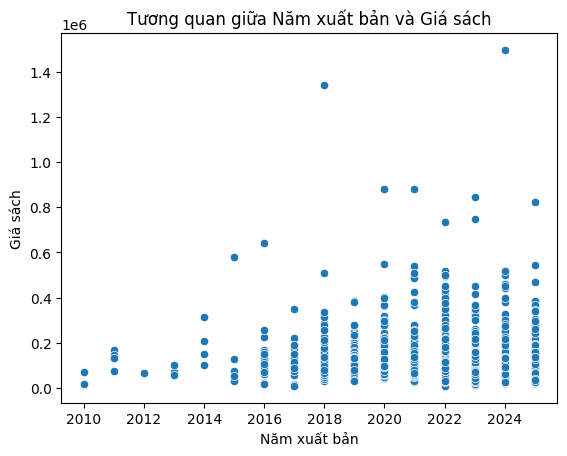

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_corr, x='Năm xuất bản điền bổ sung', y='price')
plt.title('Tương quan giữa Năm xuất bản và Giá sách')
plt.xlabel('Năm xuất bản')
plt.ylabel('Giá sách')
plt.show()


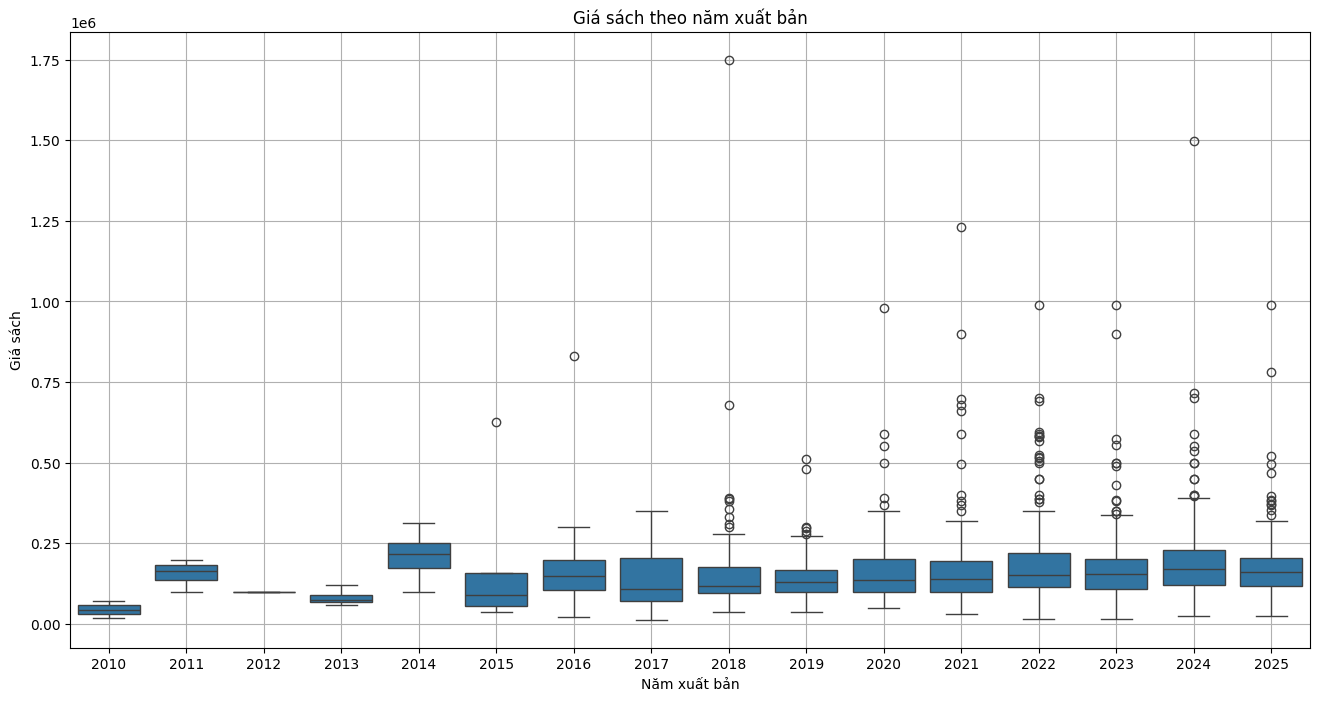

In [14]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_corr, x='Năm xuất bản điền bổ sung', y='original_price')
plt.title('Giá sách theo năm xuất bản')
plt.ylabel('Giá sách')
plt.xlabel('Năm xuất bản')
plt.grid()
plt.show()

In [15]:
check_corr_page = df_corr[['Số trang', 'Năm xuất bản điền bổ sung']].corr()
check_corr_page

,Số trang,Năm xuất bản điền bổ sung
Số trang,1.000000,-0.011583
Năm xuất bản điền bổ sung,-0.011583,1.000000


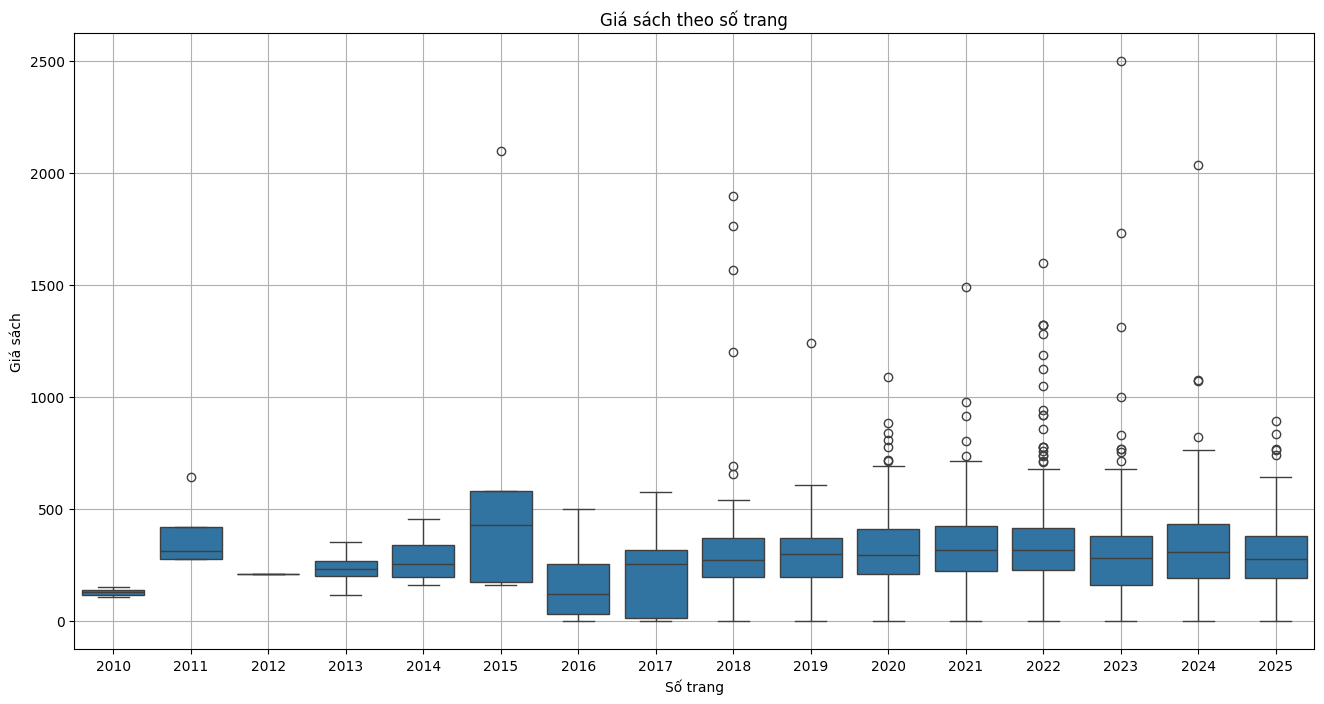

In [16]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df_corr, x='Năm xuất bản điền bổ sung', y='Số trang')
plt.title('Giá sách theo số trang')
plt.ylabel('Giá sách')
plt.xlabel('Số trang')
plt.grid()
plt.show()

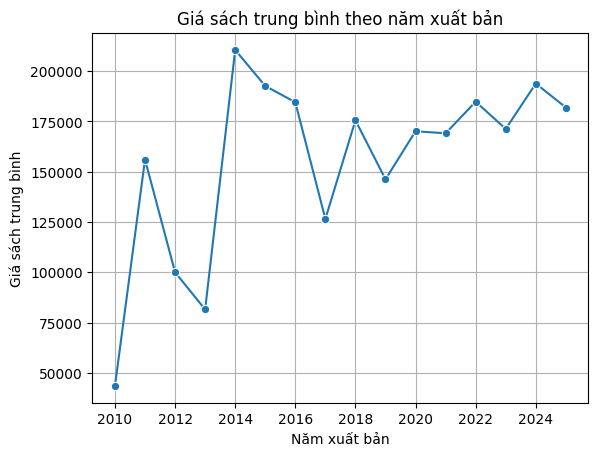

In [17]:
avg_price_by_year = df_corr.groupby('Năm xuất bản điền bổ sung')['original_price'].mean().reset_index()

sns.lineplot(data=avg_price_by_year, x='Năm xuất bản điền bổ sung', y='original_price', marker='o')
plt.title('Giá sách trung bình theo năm xuất bản')
plt.xlabel('Năm xuất bản')
plt.ylabel('Giá sách trung bình')
plt.grid()
plt.show()


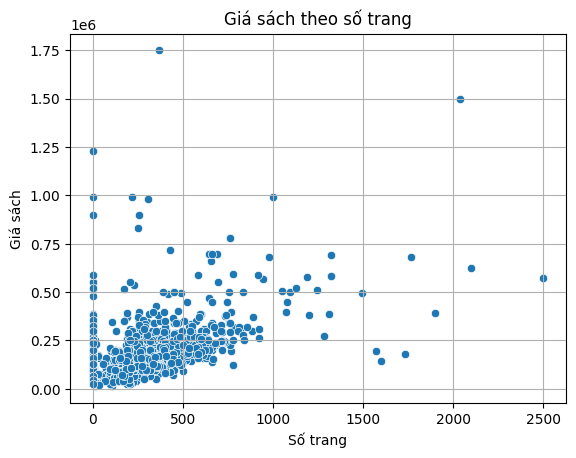

In [18]:
sns.scatterplot(data=df_corr, x='Số trang', y='original_price')
plt.title('Giá sách theo số trang')
plt.xlabel('Số trang')
plt.ylabel('Giá sách')
plt.grid()
plt.show()


In [19]:
df_corr.head(10)

,id,name,price,original_price,rating_average,review_count,author,quantity_sold,inventory_status,category_id,category_name,Công ty phát hành,Loại bìa,Số trang,Năm xuất bản điền bổ sung
0,277728224,"Nói Chuyện Là Bản Năng, Giữ Miệng Là Tu Dưỡng,...",117180,127000,4.8,419,Trương Tiếu Hằng,8646,available,316,Sách tiếng Việt,1980 Books,Bìa mềm,450,2022
1,277412034,Sách Song Ngữ Lời Thì Thầm Trong Tổ Ấm - Whisp...,158000,158000,5.0,21,Không rõ,681,available,67857,Sách học tiếng anh - khác,NXB Lao Động,Bìa cứng,280,2025
2,277409853,Bí Ẩn Thảm Án Ở Styles (Agatha Christie) (NXB ...,106000,122000,5.0,2,Agatha Christie,75,available,664,Truyện trinh thám,NXB Trẻ,Bìa mềm,296,2025
3,277381902,Tiếng gọi chân trời - Nguyễn Ngọc Tư,68100,95000,5.0,8,Nguyễn Ngọc Tư,336,available,68000,Truyện ngắn - Tản văn - Tạp Văn Việt Nam,NXB Trẻ,Bìa mềm,152,2025
4,276960030,Khi Mọi Điều Không Như Ý,68670,109000,5.0,25,Hae Min,696,available,67946,Sách tâm lý học - khác,Nhã Nam,Bìa mềm,240,2025
5,276948798,Lên Đỉnh Núi Mở Tiệm Bánh Mì - Triết lí Wazawa...,99100,120000,4.7,30,Hirata Haruka,1170,available,847,Bài học kinh doanh,Ecoblader,Bìa mềm,168,2024
6,276922095,Thế Hệ Lo Âu,156000,229000,5.0,17,Jonathan Haidt,490,available,67946,Sách tâm lý học - khác,1980 Books,Bìa mềm,439,2024
7,276823777,Tại sao các quốc gia thất bại,258000,310000,4.8,22,Daron Acemoglu - James A. Robinson,362,available,67901,Sách kinh tế học - khác,NXB Trẻ,Bìa mềm,616,2024
9,276159943,NEXUS - Lược Sử Của Những Mạng Lưới Thông Tin ...,227500,325000,5.0,142,Yuval Noah Harari,2230,available,9725,Lịch Sử Thế Giới,Alphabooks,NaN,0,2024
10,275702538,Chat GPT Thực Chiến,104800,169000,4.7,121,Dịch Dương,2617,available,385,Sách kỹ năng làm việc,1980 Books,Bìa mềm,263,2024


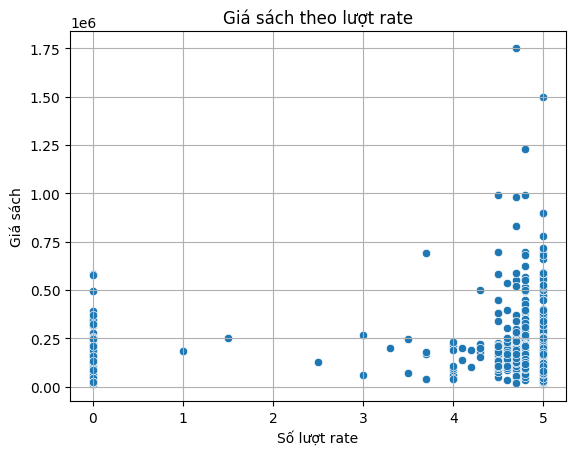

In [20]:
sns.scatterplot(data=df_corr, x='rating_average', y='original_price')
plt.title('Giá sách theo lượt rate')
plt.xlabel('Số lượt rate')
plt.ylabel('Giá sách')
plt.grid()
plt.show()

In [37]:
df.groupby('Năm xuất bản điền bổ sung')['Năm xuất bản điền bổ sung'].count()

Năm xuất bản điền bổ sung
2010      2
2011      4
2012      1
2013      4
2014      4
2015      5
2016     16
2017     23
2018     73
2019    116
2020    138
2021    214
2022    284
2023    243
2024    218
2025    122
Name: Năm xuất bản điền bổ sung, dtype: Int64